## 데이터 전처리

아무거나 입력해보자. 어떤 값이 먼저 적용될지 궁금하다.

###**버스 데이터 전처리**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
bus = pd.read_csv('/content/drive/MyDrive/공모전 시각화/BUS_STATION_BOARDING_MONTH_202301 (2).csv', encoding='cp949')

In [ ]:
bus.head(2)

,사용일자,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20230101,100,100번(하계동~용산구청),100000002,01002,창경궁.서울대학교병원(00031),33,47,20230104
1,20230101,9401,9401번(구미동~서울역),206000321,47024,샛별마을.우방아파트(00015),76,1,20230104


In [ ]:
num = pd.read_csv('/content/drive/MyDrive/공모전 시각화/서울시버스정류소좌표데이터(20220329) (2).csv', encoding='cp949')

In [ ]:
num.head(2)

,정류소ID,ARS-ID,정류소명,X좌표,Y좌표
0,100000001,1001,종로2가사거리,126.987750,37.569765
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183


In [ ]:
bus.rename(columns={'표준버스정류장ID': '정류소ID'}, inplace=True)

In [ ]:
drop_cols = ['노선명', 'ARS-ID', '등록일자', '역명']
df = pd.merge(bus, num, on='정류소ID').drop(drop_cols, axis=1).rename(columns={
    'X좌표': '경도(버스)',
    'Y좌표': '위도(버스)',
    '사용일자': '날짜'
})

---

### 1) 시내버스 분리하기
- 간선버스(Blue) 101 ~ 799
- 지선버스(Green) 1012 ~ 7999
- 광역버스(Red) 9112 ~ 9xxx
- 순환버스(yellow) 10

- 그러므로 한글로 시작하는 건, 마을버스임

In [ ]:
df['노선번호']

0           100
1           107
2           171
3           172
4           104
           ... 
1125845    성북02
1125846    성북02
1125847    성북02
1125848    성북02
1125849    서초01
Name: 노선번호, Length: 1125850, dtype: object

In [ ]:
df['노선번호'] = df['노선번호'].str.extract(r'(^\d.*)').squeeze()

In [ ]:
df.head(5)

,날짜,노선번호,정류소ID,버스정류장ARS번호,승차총승객수,하차총승객수,정류소명,경도(버스),위도(버스)
0,20230101,100,100000002,01002,33,47,창경궁.서울대학교병원,126.996566,37.579183
1,20230101,107,100000002,01002,4,16,창경궁.서울대학교병원,126.996566,37.579183
2,20230101,171,100000002,01002,49,37,창경궁.서울대학교병원,126.996566,37.579183
3,20230101,172,100000002,01002,38,34,창경궁.서울대학교병원,126.996566,37.579183
4,20230101,104,100000002,01002,34,46,창경궁.서울대학교병원,126.996566,37.579183


In [ ]:
# 마을버스 행 drop
df = df.dropna(subset=['노선번호'])

In [ ]:
df.isnull().sum()

날짜            0
노선번호          0
정류소ID         0
버스정류장ARS번호    0
승차총승객수        0
하차총승객수        0
정류소명          0
경도(버스)        0
위도(버스)        0
dtype: int64

In [ ]:
# 그래프 시각화를 위해 영어로 변경
df.rename(columns={
    '위도(버스)' : 'longitude3',
    '경도(버스)' : 'latitude3'
}, inplace=True)

In [ ]:
# 자치구 이름 변경
df['자치구'] = df["버스정류장ARS번호"].str.slice(start=0, stop=2)
df['자치구']

0          01
1          01
2          01
3          01
4          01
           ..
1125817    14
1125818    14
1125819    14
1125820    14
1125821    14
Name: 자치구, Length: 785774, dtype: object

In [ ]:
df['자치구'].unique()

array(['01', '03', '02', '23', '22', '14', '12', '19', '07', '05', '24',
       '06', '04', '20', '13', '21', '16', '15', '17', '18', '11', '08',
       '09', '61', '25', '10'], dtype=object)

In [ ]:
df['자치구'] = df['자치구'].map({
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'})


In [ ]:
df.head(2)

,날짜,노선번호,정류소ID,버스정류장ARS번호,승차총승객수,하차총승객수,정류소명,latitude3,longitude3,자치구
0,20230101,100,100000002,01002,33,47,창경궁.서울대학교병원,126.996566,37.579183,종로구
1,20230101,107,100000002,01002,4,16,창경궁.서울대학교병원,126.996566,37.579183,종로구


### subway 데이터 전처리
- 이 데이터는 날짜와 역에 따른 승차총승객수와 하차총승객수에
- 인근 거리 1km 지역의 데이터를 merge시킨 데이터이다.
- 지하철역 ~ 인근 1km지역의 위/경도 데이터를 알 수 있으며, 각 거리(km)를 알 수 있다.

In [ ]:
subway = pd.read_csv('/content/drive/MyDrive/공모전 시각화/subwayEDA (1).csv')
subway.head(2)

,사용일자,노선명,역명,승차총승객수,하차총승객수,요일,역(경도),역(위도),구,동,아파트,세부주소,아파트(위도),아파트(경도),주소,거리(km)
0,2023-01-01,2호선,신도림,20210,21037,일,37.508725,126.891295,구로구,신도림동,신도림우성5차,신도림로21길,126.883792,37.512723,서울특별시 구로구 신도림동,0.87537
1,2023-01-02,2호선,신도림,45898,44849,월,37.508725,126.891295,구로구,신도림동,신도림우성5차,신도림로21길,126.883792,37.512723,서울특별시 구로구 신도림동,0.87537


In [ ]:
# 시각화를 위해 이름 변경
subway.rename(columns={
    '역(경도)': 'latitude1',
    '역(위도)': 'longitude1',
    '아파트(경도)': 'latitude2',
    '아파트(위도)': 'longitude2'

}, inplace=True)


In [ ]:
df.rename(columns={
    '자치구': '구'
}, inplace=True)

---

### 최종 전처리된 데이터프레임 2개

In [ ]:
# 버스번호 및 버스 정류소 데이터
df.head(1)

,날짜,노선번호,정류소ID,버스정류장ARS번호,승차총승객수,하차총승객수,정류소명,latitude3,longitude3,구
0,20230101,100,100000002,01002,33,47,창경궁.서울대학교병원,126.996566,37.579183,종로구


In [ ]:
# 지하철역과 인근 1km이내의 지역 데이터
subway.head(1)

,사용일자,노선명,역명,승차총승객수,하차총승객수,요일,latitude1,longitude1,구,동,아파트,세부주소,longitude2,latitude2,주소,거리(km)
0,2023-01-01,2호선,신도림,20210,21037,일,37.508725,126.891295,구로구,신도림동,신도림우성5차,신도림로21길,126.883792,37.512723,서울특별시 구로구 신도림동,0.87537


In [ ]:
# cd /content/drive/MyDrive/공모전 시각화 (상대경로로 저장하기 위해 폴더 이동)

In [ ]:
# df.to_csv('/content/drive/MyDrive/공모전 시각화/bus_graph.csv')

In [ ]:
# subway.to_csv('/content/drive/MyDrive/공모전 시각화/subway_graph.csv')

## 정류소 위치 시각화


### (1) shp파일 읽기, dbf, shx. (OD 그래프 시각화)

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 88.0 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/공모전 시각화/test.shp'
a = gpd.read_file(path)
a.head()

,si,gu,dong,geometry
0,서울시,종로구,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,서울시,종로구,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,서울시,종로구,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,서울시,종로구,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,서울시,종로구,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."


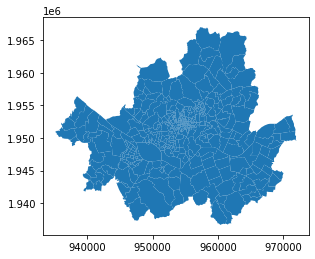

In [ ]:
a.plot()
plt.show()

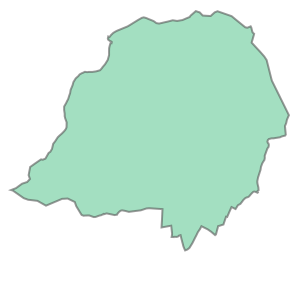

In [ ]:
a['geometry'][0] # 이런식으로 하나씩 뜯어서 살펴볼 수 있다.

In [ ]:
a['geometry']  # 데이터가 POLYGON 

0      POLYGON ((953700.022 1954605.065, 953693.871 1...
1      POLYGON ((953233.465 1953996.984, 953235.183 1...
2      POLYGON ((953560.228 1954257.466, 953561.190 1...
3      POLYGON ((953519.843 1953890.785, 953518.489 1...
4      POLYGON ((953516.123 1953734.362, 953516.526 1...
                             ...                        
462    POLYGON ((969669.593 1948748.489, 969656.716 1...
463    POLYGON ((968514.203 1950677.234, 968505.336 1...
464    POLYGON ((967686.073 1948534.011, 967685.029 1...
465    POLYGON ((968336.280 1950222.697, 968337.437 1...
466    POLYGON ((970882.440 1951500.730, 970882.447 1...
Name: geometry, Length: 467, dtype: geometry

### (2) shp파일 좌표계 변환
- 1. UTM-K(GRS80, Epsg:5179) -> WGS84(Epsg: 4326)로 변환
- 2. folium의 경우 json형태로 이용하기 위해 해당 좌표가 필요.
- 3. 다른 라이브러리도 사용하기 위해서는 어쨌든 WGS84데이터가 필요하다.

#### 2- 1. WGS84(Epsg: 4326으로 변환)

In [ ]:
# qgis를 활용하여 UTM-K 좌표계 WGS84로 변환
# 혹시 모르니 seoul shp파일은 남겨두도록 하겠다. (오늘 성록님 발표보고 shp파일로도 괜찮은 시각화가 가능함을 알 수 있었다.)

# 1. WGS84 좌표계로 변환된 shp파일 불러오기.
import geopandas as gpd
seoul = gpd.read_file('/content/drive/MyDrive/공모전 시각화/emd.shp', encoding='cp949')
seoul.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."


In [ ]:
# 뽁킹. 다시 작업을 해주어야겠다.
#  https://www.code.go.kr/stdcode/regCodeL.do 에서 직접 모두 검색 -> 행정구를 조회할 수 있다.
seoul['s'] = seoul['EMD_CD'].str.slice(0, 2)
seoul['g'] = seoul['EMD_CD'].str.slice(2, 5)
seoul['d'] = seoul['EMD_CD'].str.slice(5, )

seoul['g'] = seoul['g'].map({
    '680' : '강남구',
    '740' : '강동구',
    '305' : '강북구',
    '500' : '강서구',
    '620' : '관악구',
    '215' : '광진구',
    '530' : '구로구',
    '545' : '금천구',
    '350' : '노원구',
    '320' : '도봉구',
    '230' : '동대문구',
    '590' : '동작구',
    '440' : '마포구', 
    '410' : '서대문구',
    '650' : '서초구',
    '200' : '성동구',
    '290' : '성북구',
    '710' : '송파구',
    '470' : '양천구',
    '560' : '영등포구',
    '170' : '용산구',
    '380' : '은평구',
    '110' : '종로구',
    '140' : '중구',
    '260' : '중랑구'
})
seoul['d'] = seoul['EMD_KOR_NM']
seoul['s'] = seoul['s'].map({
    '11' : '서울시'
})

In [ ]:
drop_cols = ['EMD_ENG_NM', 'EMD_KOR_NM']
seoul.drop(drop_cols, axis=1, inplace=True)

In [ ]:
seoul.set_crs(epsg=4326, inplace=True)

,EMD_CD,geometry,s,g,d
0,11110101,"POLYGON ((126.97556 37.58968, 126.97549 37.589...",서울시,종로구,청운동
1,11110102,"POLYGON ((126.97031 37.58418, 126.97033 37.584...",서울시,종로구,신교동
2,11110103,"POLYGON ((126.97400 37.58654, 126.97401 37.586...",서울시,종로구,궁정동
3,11110104,"POLYGON ((126.97356 37.58323, 126.97355 37.582...",서울시,종로구,효자동
4,11110105,"POLYGON ((126.97353 37.58182, 126.97354 37.581...",서울시,종로구,창성동
...,...,...,...,...,...
5060,50130250,"MULTIPOLYGON (((126.26737 33.11371, 126.26731 ...",NaN,NaN,대정읍
5061,50130253,"MULTIPOLYGON (((126.65497 33.22403, 126.65455 ...",NaN,NaN,남원읍
5062,50130259,"MULTIPOLYGON (((126.90332 33.40168, 126.90328 ...",NaN,NaN,성산읍
5063,50130310,"MULTIPOLYGON (((126.31411 33.20756, 126.31400 ...",NaN,NaN,안덕면


In [ ]:
cond = seoul['EMD_CD'].str.slice(0,2) == '11'
seoul = seoul[cond]
seoul.shape

(467, 5)

In [ ]:
cd /content/drive/MyDrive/공모전 시각화

/content/drive/MyDrive/공모전 시각화


In [ ]:
# wgs84 데이터로 변환된 shp파일 다시 저장
# seoul.to_file('./wgs84.shp', encoding='cp949')

In [ ]:
# 저장된 wgs84데이터 다시 불러오기
k = gpd.read_file('/content/drive/MyDrive/공모전 시각화/wgs84.shp')
k.head(2)

,EMD_CD,s,g,d,geometry
0,11110101,서울시,종로구,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,11110102,서울시,종로구,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."


#### 2-2 geojson형태로 변환

In [ ]:
import pandas as pd
import json
import pprint
state_geo = 'wgs84.json'
# geo = json.loads('/content/drive/MyDrive/공모전 시각화/wgs84.json')
state_geo = json.load(open(state_geo, encoding='utf-8'))

In [ ]:
state_geo['features']

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[126.976, 37.59],
     [126.975, 37.591],
     [126.974, 37.592],
     [126.974, 37.593],
     [126.973, 37.593],
     [126.973, 37.594],
     [126.972, 37.594],
     [126.971, 37.594],
     [126.97, 37.594],
     [126.97, 37.593],
     [126.969, 37.593],
     [126.968, 37.594],
     [126.967, 37.593],
     [126.966, 37.593],
     [126.967, 37.593],
     [126.966, 37.593],
     [126.966, 37.592],
     [126.966, 37.591],
     [126.965, 37.591],
     [126.964, 37.591],
     [126.964, 37.59],
     [126.964, 37.589],
     [126.964, 37.588],
     [126.963, 37.588],
     [126.962, 37.588],
     [126.962, 37.587],
     [126.961, 37.587],
     [126.962, 37.587],
     [126.962, 37.586],
     [126.963, 37.586],
     [126.964, 37.586],
     [126.965, 37.586],
     [126.966, 37.586],
     [126.967, 37.586],
     [126.968, 37.586],
     [126.969, 37.586],
     [126.969, 37.585],
     [126.97, 37.585],
     [126.97, 37.584],


In [ ]:
k.head()

,EMD_CD,s,g,d,geometry
0,11110101,서울시,종로구,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,11110102,서울시,종로구,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,11110103,서울시,종로구,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,11110104,서울시,종로구,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,11110105,서울시,종로구,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."


In [ ]:
#### 주의 - 밑에 있는 데이터는 메모리 부족으로 인해 세션 초기화가 발생할 수 있음 ###### 

In [ ]:
!pip install pydeck

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 33.6 MB/s eta 0:00:00


In [ ]:
!jupyter nbextension install --sys-prefix --symlink --overwrite --py pydeck
!jupyter nbextension enable --sys-prefix --py pydeck

Installing /usr/local/lib/python3.9/dist-packages/pydeck/nbextension/static -> pydeck
Symlinking: /usr/share/jupyter/nbextensions/pydeck -> /usr/local/lib/python3.9/dist-packages/pydeck/nbextension/static
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable pydeck --py --sys-prefix
    
Enabling notebook extension pydeck/extensionRequires...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
MAPBOX_API_KEY = "pk.eyJ1IjoibWluc3Vicm90aGVyIiwiYSI6ImNsZjdtbms1aTBvOGIzcXFtYnF0bG4zMHoifQ.PW06ayM3G1xnDLwm_jsuUQ"  # it is my key
# 여러분들도 API_KEY를 만들어보아요.

In [ ]:
!pip install mapboxgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chroma-py: filename=chroma_py-0.1.0.dev1-py3-none-any.whl size=5118 sha256=2a9f981931bc95419ceaef1e12e5f4b48fbb33351ff3ca354a2ed88f7f1bbf18
  Stored in directory: /root/.cache/pip/wheels/0c/e3/f9/cf6a213c7cf0e23ff44ec92c4cb837eebb9adb10533cece52e
Successfully built chroma-py


In [ ]:

import geopandas as gpd
import folium

### 자치구에 따른 승차총승객수, 하차총승객수 시각화

In [ ]:
# 행정동 단위의 지도 데이터 파일
#state_geo

# 서울시 중심부의 위도, 경도 입니다.
center = [37.541, 126.986]

# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10, titles='cartodpositron')

folium.Choropleth(
    geo_data = state_geo,
    data = df,
    columns = ('구', '승차총승객수', '하차총승객수'),
    key_on='feature.properties.g',
    fill_color='BuPu',
    legend_name='승하차 총 승객 수'
).add_to(m)

m


In [ ]:
# m4 = folium.Map(location=[37.5502, 126.982],zoom_start=12)

# for item in subway.index:
#   start = tuple(subway[subway.index==item][['역(경도)', '역(위도)']].iloc[0])
#   end = tuple(subway[subway.index==item][['아파트(경도)', '아파트(위도)']].iloc[0])
#   folium.PolyLine(
#       locations=[start, end],
#       color='blue',
#       opacity=0.6,
#       line_cap='round',
#   ).add_to(m4)

#   folium.CircleMarker(
#       start,
#       popup = subway.loc[item, '역명'],
#       color = "#000",
#       fill_color = "#ccc", fill_opacity=1, opacity=1
#   ).add_to(m4)

#   folium.CircleMarker(
#       end,
#       popup=subway.loc[item, '아파트'],
#       color='#000',
#       fill_color="#ccc", fill_opacity=1, opacity=1
#   ).add_to(m4)


#   m4

#### 밑에 있는 데이터는 사용에 주의를 요함! (메모리 부족 오류남)

In [ ]:
import geopandas as gpd
from pandas import json_normalize
u = json_normalize(state_geo['features'])
drop_cols = ['type', 'geometry.type']
u.drop(drop_cols, axis=1, inplace=True)

In [ ]:
u.head()

,geometry.coordinates,properties.EMD_CD,properties.s,properties.g,properties.d
0,"[[[126.976, 37.59], [126.975, 37.591], [126.97...",11110101,서울시,종로구,청운동
1,"[[[126.97, 37.584], [126.97, 37.585], [126.969...",11110102,서울시,종로구,신교동
2,"[[[126.974, 37.587], [126.974, 37.586], [126.9...",11110103,서울시,종로구,궁정동
3,"[[[126.974, 37.583], [126.973, 37.583], [126.9...",11110104,서울시,종로구,효자동
4,"[[[126.974, 37.582], [126.973, 37.582], [126.9...",11110105,서울시,종로구,창성동


In [ ]:
u.rename(columns= {
    'geometry.coordinates': 'corrdinates',
    'properties.EMD_CD': 'EMD_CD',
    'properties.s': 's',
    'properties.g': 'g',
    'properties.d' : 'd'
}, inplace=True)

In [ ]:
u.head()

,corrdinates,EMD_CD,s,g,d
0,"[[[126.976, 37.59], [126.975, 37.591], [126.97...",11110101,서울시,종로구,청운동
1,"[[[126.97, 37.584], [126.97, 37.585], [126.969...",11110102,서울시,종로구,신교동
2,"[[[126.974, 37.587], [126.974, 37.586], [126.9...",11110103,서울시,종로구,궁정동
3,"[[[126.974, 37.583], [126.973, 37.583], [126.9...",11110104,서울시,종로구,효자동
4,"[[[126.974, 37.582], [126.973, 37.582], [126.9...",11110105,서울시,종로구,창성동


In [ ]:
subway.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '요일', '역(경도)', '역(위도)', '구',
       '동', '아파트', '세부주소', '아파트(위도)', '아파트(경도)', '주소', '거리(km)'],
      dtype='object')

In [ ]:
subway.rename(columns={
    '구': 'g',
    '동': 'd'
}, inplace=True)

In [ ]:
eda_01.head()

In [ ]:
# merge with u and subway
eda01 = pd.merge(u, subway, on='d', how='inner')

In [ ]:
eda01.head()

,corrdinates,EMD_CD,s,g_x,d,사용일자,노선명,역명,승차총승객수,하차총승객수,요일,역(경도),역(위도),g_y,아파트,세부주소,아파트(위도),아파트(경도),주소,거리(km)
0,"[[[127.015, 37.582], [127.014, 37.582], [127.0...",11110174,서울시,종로구,창신동,2023-01-01,6호선,창신,1372,1387,일,37.579661,127.015241,종로구,창신두산,지봉로5길,127.014293,37.574221,서울특별시 종로구 창신동,0.378859
1,"[[[127.015, 37.582], [127.014, 37.582], [127.0...",11110174,서울시,종로구,창신동,2023-01-02,6호선,창신,3485,2942,월,37.579661,127.015241,종로구,창신두산,지봉로5길,127.014293,37.574221,서울특별시 종로구 창신동,0.378859
2,"[[[127.015, 37.582], [127.014, 37.582], [127.0...",11110174,서울시,종로구,창신동,2023-01-03,6호선,창신,3707,3057,화,37.579661,127.015241,종로구,창신두산,지봉로5길,127.014293,37.574221,서울특별시 종로구 창신동,0.378859
3,"[[[127.015, 37.582], [127.014, 37.582], [127.0...",11110174,서울시,종로구,창신동,2023-01-04,6호선,창신,3700,3087,수,37.579661,127.015241,종로구,창신두산,지봉로5길,127.014293,37.574221,서울특별시 종로구 창신동,0.378859
4,"[[[127.015, 37.582], [127.014, 37.582], [127.0...",11110174,서울시,종로구,창신동,2023-01-05,6호선,창신,3608,3145,목,37.579661,127.015241,종로구,창신두산,지봉로5길,127.014293,37.574221,서울특별시 종로구 창신동,0.378859


In [ ]:
# make layer
layer = pdk.Layer(
    'ScatterplotLayer', # 사용할 Layer 타입
    eda01, # 시각화에 쓰일 데이터프레임
    #get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_position=['역(위도)', '역(경도)'],
    get_fill_color='[255, 255, 255]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
)

center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10)

r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-165-5b545656dd44>", line 18, in <module>
    r = pdk.Deck(layers=[layer], initial_view_state=view_state)
  File "/usr/local/lib/python3.9/dist-packages/pydeck/bindings/deck.py", line 100, in __init__
    if has_jupyter_extra():
  File "/usr/local/lib/python3.9/dist-packages/pydeck/bindings/deck.py", line 16, in has_jupyter_extra
    from ..widget import DeckGLWidget
  File "/usr/local/lib/python3.9/dist-packages/pydeck/widget/__init__.py", line 1, in <module>
    from .widget import DeckGLWidget  # noqa
  File "/usr/local/lib/python3.9/dist-packages/pydeck/widget/widget.py", line 4, in <module>
    from ipywidgets import register, CallbackDispatcher, DOMWidget
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 

OSError: ignored